In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

## A guilde to downloading data

#### Import Libraries needed

In [2]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

#### Downloading the data using yfinance

Given a ticker you can use the download function to get stock pricing data

In [6]:
ticker = 'RIOT'
df = yf.download(ticker, progress=False) # without the dates returns all possible
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-31,2.31,2.835,2.31,2.70,2.407792,81900
2016-04-01,2.60,2.690,2.47,2.63,2.345368,47900
2016-04-04,2.63,2.630,2.63,2.63,2.345368,0
2016-04-05,2.88,3.300,2.69,3.02,2.693160,223900
2016-04-06,3.09,3.180,2.85,2.98,2.657489,20600


You can also use the Ticker class to collect data as well.

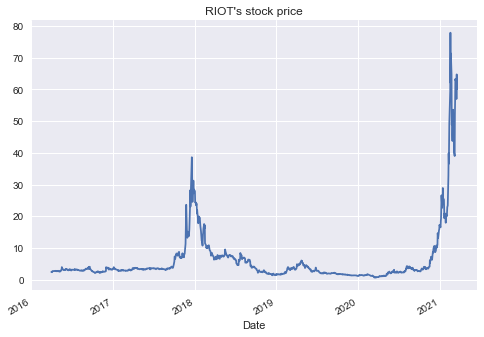

In [5]:
ticker_cd = 'RIOT'
ticker = yf.Ticker('RIOT')

df = ticker.history(period="max")

df['Close'].plot(title="RIOT's stock price")

#### Downloading the data using yahoofinancials

As the name suggests there are similarities based on where the data is pulled, but with yahoofinancials you can also pull data to help determine the value of the company and understand how healthy it is. 

In [10]:
ticker = 'RIOT'
yahoo_financials = YahooFinancials(ticker)

data = yahoo_financials.get_historical_price_data(start_date='2008-01-01', end_date='2021-02-28', time_interval='weekly')

tsla_df = pd.DataFrame(data[ticker]['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2016-03-28,2.835,2.31,2.31,2.63,129800,2.345368
2016-04-04,3.300,2.63,2.63,2.97,397500,2.648571
2016-04-11,3.160,2.86,2.99,3.03,326500,2.702078
2016-04-18,3.125,2.96,3.05,3.07,100800,2.737749
2016-04-25,3.180,2.80,3.02,3.09,84800,2.755584


The folllowing uses one of the many methods built in the library. For more information check out the documentation at [yahoofinancials](https://pypi.org/project/yahoofinancials/).

In [11]:
yahoo_financials.get_stock_quote_type_data()

{'RIOT': {'exchange': 'NMS',
  'shortName': 'Riot Blockchain, Inc',
  'longName': 'Riot Blockchain, Inc.',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EDT',
  'isEsgPopulated': False,
  'gmtOffSetMilliseconds': '-14400000',
  'quoteType': 'EQUITY',
  'symbol': 'RIOT',
  'messageBoardId': 'finmb_1532998',
  'market': 'us_market'}}

Expanding on the data collection function provided above we can also look at multiple tickers if we know what we are looking for. The following shows how to get the closing price of 5 stocks and plots them in a single chart. 

#### Plotting multiple tickers

First we define stocks that we want to look at

In [ ]:
portfolio = ['WM','TSLA','SPY','SHOP', 'LULU']

First using the yfinance method we can download all the data based on the variable we specify. The variables can be chosen from the following:

- Open
- High
- Low
- Close
- Adj Close
- Volumne

In [16]:
data = yf.download(portfolio)['Close']
data.tail()

[*********************100%***********************]  5 of 5 completed


,LULU,SHOP,SPY,TSLA,WM
Date,,,,,
2021-03-15,314.320007,1159.000000,396.410004,707.940002,122.620003
2021-03-16,308.750000,1143.170044,395.910004,676.880005,122.910004
2021-03-17,315.220001,1169.170044,397.260010,701.809998,118.989998
2021-03-18,306.350006,1117.099976,391.480011,653.159973,121.900002
2021-03-19,308.709991,1120.949951,389.480011,654.869995,121.570000


[*********************100%***********************]  5 of 5 completed


<AxesSubplot:xlabel='Date'>

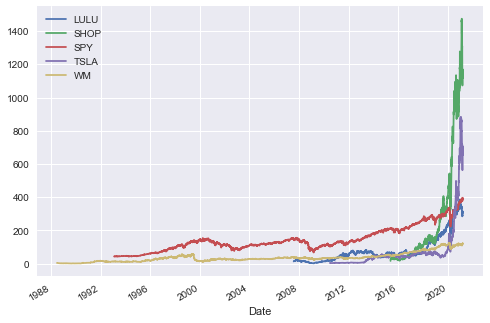

In [15]:
data.plot()

This plot seems to show us that the prices for Shopify & Tesla have an exponential like increase in price. SPY, which is the former Standard & Poor's Depositary Receipts has a steady increase up to around $390, which Lululemon has been catching up to. The chart above could look different by setting the timeframe. 

In the following we use the [yahoo_financials](https://pypi.org/project/yahoofinancials/) methods and specifying the dates to see a different view of the timeseries. When the dates are not aligned across all tickers there may be more than 1 plot generated. 

<AxesSubplot:>

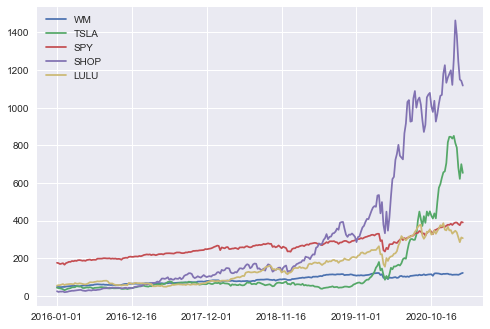

In [26]:
yahoo_financials = YahooFinancials(portfolio)

data = yahoo_financials.get_historical_price_data(start_date='2016-01-01', 
                                                  end_date='2021-03-19', 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in portfolio})
#prices_df.head()
prices_df.plot()